In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [2]:
# Load the data
mnist = tf.keras.datasets.mnist
type(mnist.load_data())

tuple

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"x_train.shape: {x_train.shape}")

x_train.shape: (60000, 28, 28)


In [4]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
             loss="sparse_categorical_crossentropy",
             metrics=['accuracy'])

In [5]:
# Train the model
results = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 8s 135us/sample - loss: 2.5351 - accuracy: 0.8486 - val_loss: 0.5530 - val_accuracy: 0.8734
Epoch 2/15
60000/60000 [==============================] - 8s 126us/sample - loss: 0.4155 - accuracy: 0.9055 - val_loss: 0.4279 - val_accuracy: 0.9074
Epoch 3/15
60000/60000 [==============================] - 8s 125us/sample - loss: 0.3194 - accuracy: 0.9222 - val_loss: 0.3421 - val_accuracy: 0.9172
Epoch 4/15
60000/60000 [==============================] - 6s 105us/sample - loss: 0.2589 - accuracy: 0.9351 - val_loss: 0.3978 - val_accuracy: 0.9247
Epoch 5/15
60000/60000 [==============================] - 6s 108us/sample - loss: 0.2393 - accuracy: 0.9425 - val_loss: 0.2504 - val_accuracy: 0.9441
Epoch 6/15
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2198 - accuracy: 0.9479 - val_loss: 0.2982 - val_accuracy: 0.9382
Epoch 7/15
60000/60000 [==========================

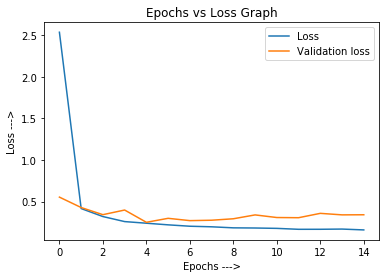

In [6]:
# Plot loss as per iteration
import matplotlib.pyplot as plt
plt.plot(results.history['loss'], label="Loss")
plt.plot(results.history['val_loss'], label="Validation loss")
plt.legend()
plt.title("Epochs vs Loss Graph")
plt.xlabel("Epochs --->")
plt.ylabel("Loss --->")
plt.show()

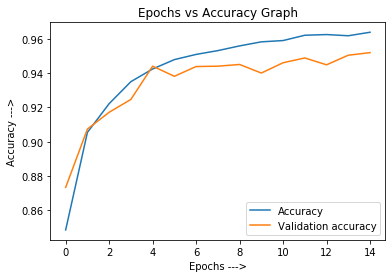

In [7]:
# Plot accuracy as per iteration
plt.plot(results.history['accuracy'], label="Accuracy")
plt.plot(results.history['val_accuracy'], label="Validation accuracy")
plt.legend()
plt.title("Epochs vs Accuracy Graph")
plt.xlabel("Epochs --->")
plt.ylabel("Accuracy --->")
plt.show()

In [8]:
print(model.evaluate(x_test, y_test))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3409119451453989, 0.952]


Confusion matrix without Normalization
[[ 964    0    1    0    0    1    5    1    8    0]
 [   1 1112    5    2    1    3    1    0   10    0]
 [   6    0  983    2    3    0    2    3   31    2]
 [   2    0   11  943    0   13    0    9   31    1]
 [   2    2    6    1  930    0    4    5   15   17]
 [   6    1    0   25    3  815    8    1   30    3]
 [   7    3    0    0    2    8  925    0   13    0]
 [   3    2   11    3    5    0    0  987   10    7]
 [   7    0    5    3    6    2    3    2  944    2]
 [   4    5    0    4   43    3    0   11   22  917]]


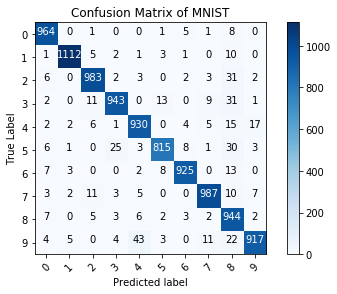

In [9]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title="Confusion Matrix of MNIST",
                         cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix without Normalization")
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted label")
    plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

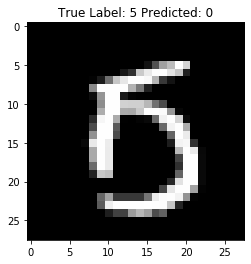

In [40]:
# show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title(f"True Label: {y_test[i]} Predicted: {p_test[i]}")
plt.show()